# Housing Prices Competition

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)


Попросите покупателя жилья описать дом своей мечты, и он, вероятно, не начнет с высоты подвального потолка или близости к железной дороге восток - запад. Но данные этого конкурса игровых площадок доказывают, что на переговоры о цене влияет гораздо больше, чем количество спален или забор из белого штакетника.

С 79 объясняющими переменными, описывающими (почти) каждый аспект жилых домов в Эймсе, штат Айова, этот набор данныхставит перед вами задачу предсказать окончательную цену каждого дома

Набор данных [тут](https://www.kaggle.com/c/home-data-for-ml-course/overview/evaluation)

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [32]:
df_train.columnsumns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [45]:
X = df_train[['LotArea', '2ndFlrSF', 'KitchenAbvGr', 'YearBuilt']]

In [46]:
y = df_train['SalePrice']

In [39]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'SalePrice')

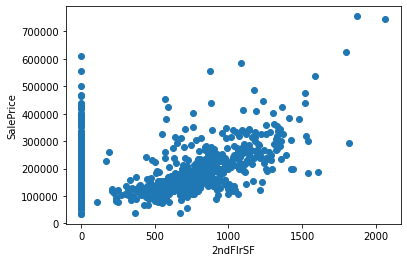

In [126]:
plt.scatter(X["2ndFlrSF"], y)
plt.xlabel("2ndFlrSF")
plt.ylabel("SalePrice")

In [54]:
X

,LotArea,2ndFlrSF,KitchenAbvGr,YearBuilt
0,8450,854,1,2003
1,9600,0,1,1976
2,11250,866,1,2001
3,9550,756,1,1915
4,14260,1053,1,2000
...,...,...,...,...
1455,7917,694,1,1999
1456,13175,0,1,1978
1457,9042,1152,1,1941
1458,9717,0,1,1950


In [127]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [135]:
scaler = MinMaxScaler()
X[['LotArea', '2ndFlrSF', 'KitchenAbvGr']] = scaler.fit_transform(X[['LotArea', '2ndFlrSF', 'KitchenAbvGr']])

/tmp/ipykernel_3614/3984563265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['LotArea', '2ndFlrSF', 'KitchenAbvGr']] = scaler.fit_transform(X[['LotArea', '2ndFlrSF', 'KitchenAbvGr']])


In [136]:
X

,LotArea,2ndFlrSF,KitchenAbvGr,YearBuilt
0,0.033420,0.413559,0.333333,2003
1,0.038795,0.000000,0.333333,1976
2,0.046507,0.419370,0.333333,2001
3,0.038561,0.366102,0.333333,1915
4,0.060576,0.509927,0.333333,2000
...,...,...,...,...
1455,0.030929,0.336077,0.333333,1999
1456,0.055505,0.000000,0.333333,1978
1457,0.036187,0.557869,0.333333,1941
1458,0.039342,0.000000,0.333333,1950


In [137]:
from tqdm import tqdm

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [82]:
errors = []
for estm in tqdm(range(100, 1000, 100)):
    regr = RandomForestRegressor(max_depth=7,n_estimators=estm, random_state=0)
    regr.fit(X_train, y_train)
    errors.append(mean_absolute_error(y_test,regr.predict(X_test)))

100%|█████████████████████████████████████████████| 9/9 [00:06<00:00,  1.47it/s]


In [154]:
regr = RandomForestRegressor(max_depth=20,  n_estimators=1000, random_state=0)

In [155]:
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=1000, random_state=0)

In [156]:
mean_absolute_error(y_test,regr.predict(X_test))

32617.359258789253

In [150]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[1, 20], 'n_estimators':[100, 1000]}


In [151]:
import sklearn
print("Метрики")
print("="*30)
for x in sorted(sklearn.metrics.SCORERS.keys()):
    print(x)

Метрики
accuracy
adjusted_mutual_info_score
adjusted_rand_score
average_precision
balanced_accuracy
completeness_score
explained_variance
f1
f1_macro
f1_micro
f1_samples
f1_weighted
fowlkes_mallows_score
homogeneity_score
jaccard
jaccard_macro
jaccard_micro
jaccard_samples
jaccard_weighted
max_error
mutual_info_score
neg_brier_score
neg_log_loss
neg_mean_absolute_error
neg_mean_absolute_percentage_error
neg_mean_gamma_deviance
neg_mean_poisson_deviance
neg_mean_squared_error
neg_mean_squared_log_error
neg_median_absolute_error
neg_root_mean_squared_error
normalized_mutual_info_score
precision
precision_macro
precision_micro
precision_samples
precision_weighted
r2
rand_score
recall
recall_macro
recall_micro
recall_samples
recall_weighted
roc_auc
roc_auc_ovo
roc_auc_ovo_weighted
roc_auc_ovr
roc_auc_ovr_weighted
top_k_accuracy
v_measure_score


In [152]:
clf = GridSearchCV(RandomForestRegressor(), parameters, scoring='neg_mean_absolute_error')
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 20], 'n_estimators': [100, 1000]},
             scoring='neg_mean_absolute_error')

In [153]:
clf.best_params_

{'max_depth': 20, 'n_estimators': 1000}

Text(0, 0.5, 'mean_absolute_error')

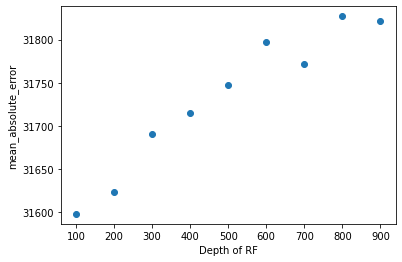

In [84]:
plt.scatter(list(range(100,1000,100)),errors )
plt.xlabel("Depth of RF")
plt.ylabel("mean_absolute_error")

In [145]:
min(errors)

31598.08208076311